<a href="https://colab.research.google.com/github/fkivuti/Sweet-Lift-Taxi-Time-Series-Project/blob/main/Time_Series_Analysis_and_Forecasting_project_ipynb_wk7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Sweet Lift Taxi, I have been tasked to build a model that predicts the number of Taxi orders at the airports in the next hour.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model are RMSE which shouldnt exceed 48

### c) Understanding the Context 

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the number of taxi orders for the next hour.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [3]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [7]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0])

# Sort data by index and resample the orders per hour
df.sort_index(inplace=True)
df = df.resample('1H').sum()
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


In [8]:
# checking dataset shape
df.shape

(4416, 1)

In [9]:
# checking data types
df.dtypes

num_orders    int64
dtype: object

# <font color='#2F4F4F'>3. Data Analysis</font>

In [10]:
# Check minimum and maximum date and time of the dataframe
print(df.index.min(), df.index.max())

2018-03-01 00:00:00 2018-08-31 23:00:00


In [11]:
# check if date and time are in chronological order
print(df.index.is_monotonic)

True


Our data set ranges from 1st march 2018 at 00:00hrs to 31st august 2018 23:00hrs

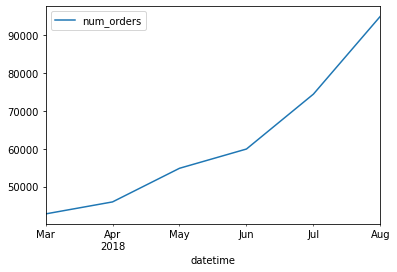

In [12]:
df_mnth= df.resample('1M').sum()
df_mnth.plot()

We had the highest number if order is the month of august 2018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


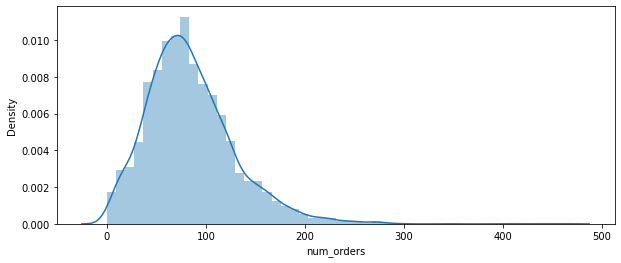

In [13]:
# distribution of monthly number of orders
plt.figure(figsize = (10,4))
sns.distplot(df['num_orders'])
plt.show()

The number of orders is positively skewed with the highest frequency being about 14 orders per hour

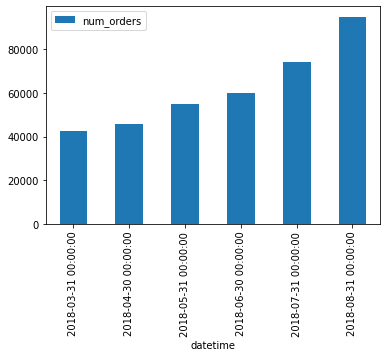

In [14]:
df_mnth.plot(kind = 'bar', rot = 90)

Orders indicate an upward trend from march to august 2018

In [15]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## 3.1 Seasonality and Trends

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


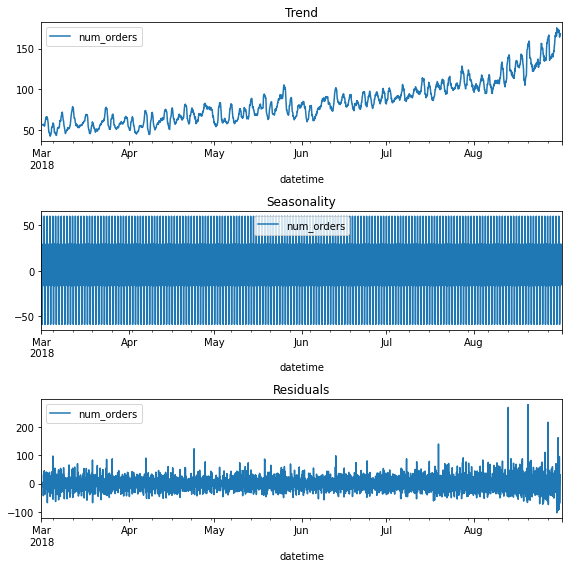

In [16]:
# Plot trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

df = df['2018-03':'2018-08'].resample('1H').sum()

decomposed = seasonal_decompose(df)

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout() 

## 3.2 Creating new features

In [17]:
# create new features i.e. year, month, day, dayof the week, hour and rolling mean

def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag) 

    # we add a rolling mean
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean() 

make_features(df, 1, 1)
print(df.head())

                     num_orders  year  month  day  dayofweek  hour  lag_1  \
datetime                                                                    
2018-03-01 00:00:00         124  2018      3    1          3     0    NaN   
2018-03-01 01:00:00          85  2018      3    1          3     1  124.0   
2018-03-01 02:00:00          71  2018      3    1          3     2   85.0   
2018-03-01 03:00:00          66  2018      3    1          3     3   71.0   
2018-03-01 04:00:00          43  2018      3    1          3     4   66.0   

                     rolling_mean  
datetime                           
2018-03-01 00:00:00           NaN  
2018-03-01 01:00:00         124.0  
2018-03-01 02:00:00          85.0  
2018-03-01 03:00:00          71.0  
2018-03-01 04:00:00          66.0  


## 3.3 Bivariate Analysis

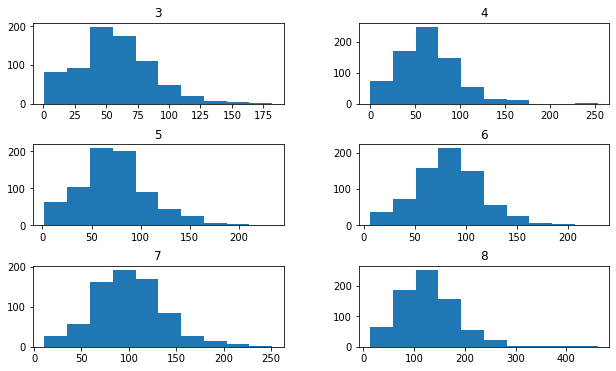

In [18]:
# plot histogram of number of orders by month
df.hist('num_orders', by = 'month', rot = 0, figsize = (10, 6))
plt.show()

The distributions by month for number of orders are positively skewed

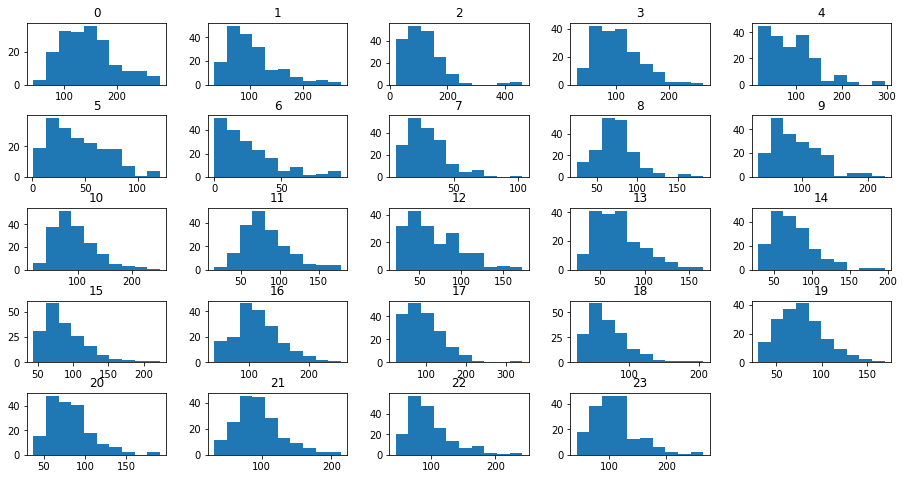

In [19]:
# plot histogram of number of orders by month
df.hist('num_orders', by = 'hour', rot = 0, figsize = (15, 8))
plt.show()

# <font color='#2F4F4F'>4. Data Modeling</font>

In [115]:
df.num_orders.describe()

count    2928.000000
mean       69.478484
std        33.797497
min         0.000000
25%        47.000000
50%        67.000000
75%        89.000000
max       253.000000
Name: num_orders, dtype: float64

## split data

In [117]:
# Split the data into test and train data and size of test data is 10%

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']


## Train and evalute Linear Regression model

In [118]:
train and evaluate the model using linear regression

lr = LinearRegression()
#fit model
lr.fit(features_train, target_train)

#predict
y_pred = lr.predict(features_test)

#evaluate model
print('RMSE:', np.sqrt(mean_squared_error(target_test, y_pred)))


RMSE: 30.11477291517167


The linear regression model gave an RMSE of 30.11 though this is still much higher than the 10% of mean value of orders which is about 7

## Train and evalute Random Forest model

In [119]:
# Train and evaluate model using Random forest regresion 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
#fit model
rf.fit(features_train, target_train)

#predict
y_pred2 = rf.predict(features_test)

#evaluate model
print('RMSE:', np.sqrt(mean_squared_error(target_test, y_pred2)))

RMSE: 22.667871566717235


Random forest even gives a better RMSE score of 22. which is better than previous value from Linear regression

# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

Random forest gave us the lowest RMSE value of 22. Thus further tunning should focus on this model

# <font color='#2F4F4F'>6. Recommendations</font>

There is need for further tunning using different hyperparameters to try and obtain values that are close to 10 percent of the mean number of orders in addition to futher feature engineering.

We may need to increase the data and see if this with enable the model to learn better and give better scores.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
Yes we did


### b) Did we have the right data?
Yes though we will need more data for further testing.

### c) What can be done to improve the solution?

Hyperparameter tuning
Feature engineering
Add more to train the model better.
